<a href="https://colab.research.google.com/github/yejining99/nft_image/blob/main/nft%20transaction%20graph%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [162]:
combined = pd.read_csv('/content/drive/MyDrive/nft/combined.csv')

In [163]:
name_list = combined['tokenName'].unique()
name = name_list[4]

In [164]:
# dataset
df_combined = combined[combined['tokenName']==name][['to','tokenID']]
df_combined.head(5)

,to,tokenID
78833,0x92e140218568d949cbd014ddd56921e139f79008,5859
78834,0x38331e91bfede95dd91b37e9841724ee06d42c7d,7508
78835,0x97fe8b7ba616945b5031e146229b9e727830f131,9630
78836,0xbb3913478dedac0fb452b777fb7f33111d67fffc,2948
78837,0x529ceac68e753e6b7aa01f8997278dff73c4c9f8,5859


In [165]:
user_to_index = {user: index for index, user in enumerate(df_combined['to'].unique())}
df_combined['user_idx'] = df_combined['to'].map(user_to_index)

In [166]:
df_combined.head(5)

,to,tokenID,user_idx
78833,0x92e140218568d949cbd014ddd56921e139f79008,5859,0
78834,0x38331e91bfede95dd91b37e9841724ee06d42c7d,7508,1
78835,0x97fe8b7ba616945b5031e146229b9e727830f131,9630,2
78836,0xbb3913478dedac0fb452b777fb7f33111d67fffc,2948,3
78837,0x529ceac68e753e6b7aa01f8997278dff73c4c9f8,5859,4


In [167]:
print(df_combined['to'].nunique(), 'unique users')
print(df_combined['tokenID'].nunique(), 'unique items')
print(df_combined.shape[0], 'transactions')

8029 unique users
4657 unique items
14009 transactions


In [168]:
import random
a=df_combined.index.to_list()
b=random.sample(a,1000)
sample_df_combined = df_combined.loc[b]

In [169]:
print(sample_df_combined['to'].nunique(), 'unique users')
print(sample_df_combined['tokenID'].nunique(), 'unique items')
print(sample_df_combined.shape[0], 'transactions')

896 unique users
876 unique items
1000 transactions


In [170]:
G = nx.Graph()

In [171]:
G.nodes

NodeView(())

In [172]:
item = []
user = []
for k,t in zip(sample_df_combined['tokenID'],sample_df_combined['to']):
  G.add_edge(k, t)
  item.append(k)
  user.append(t)

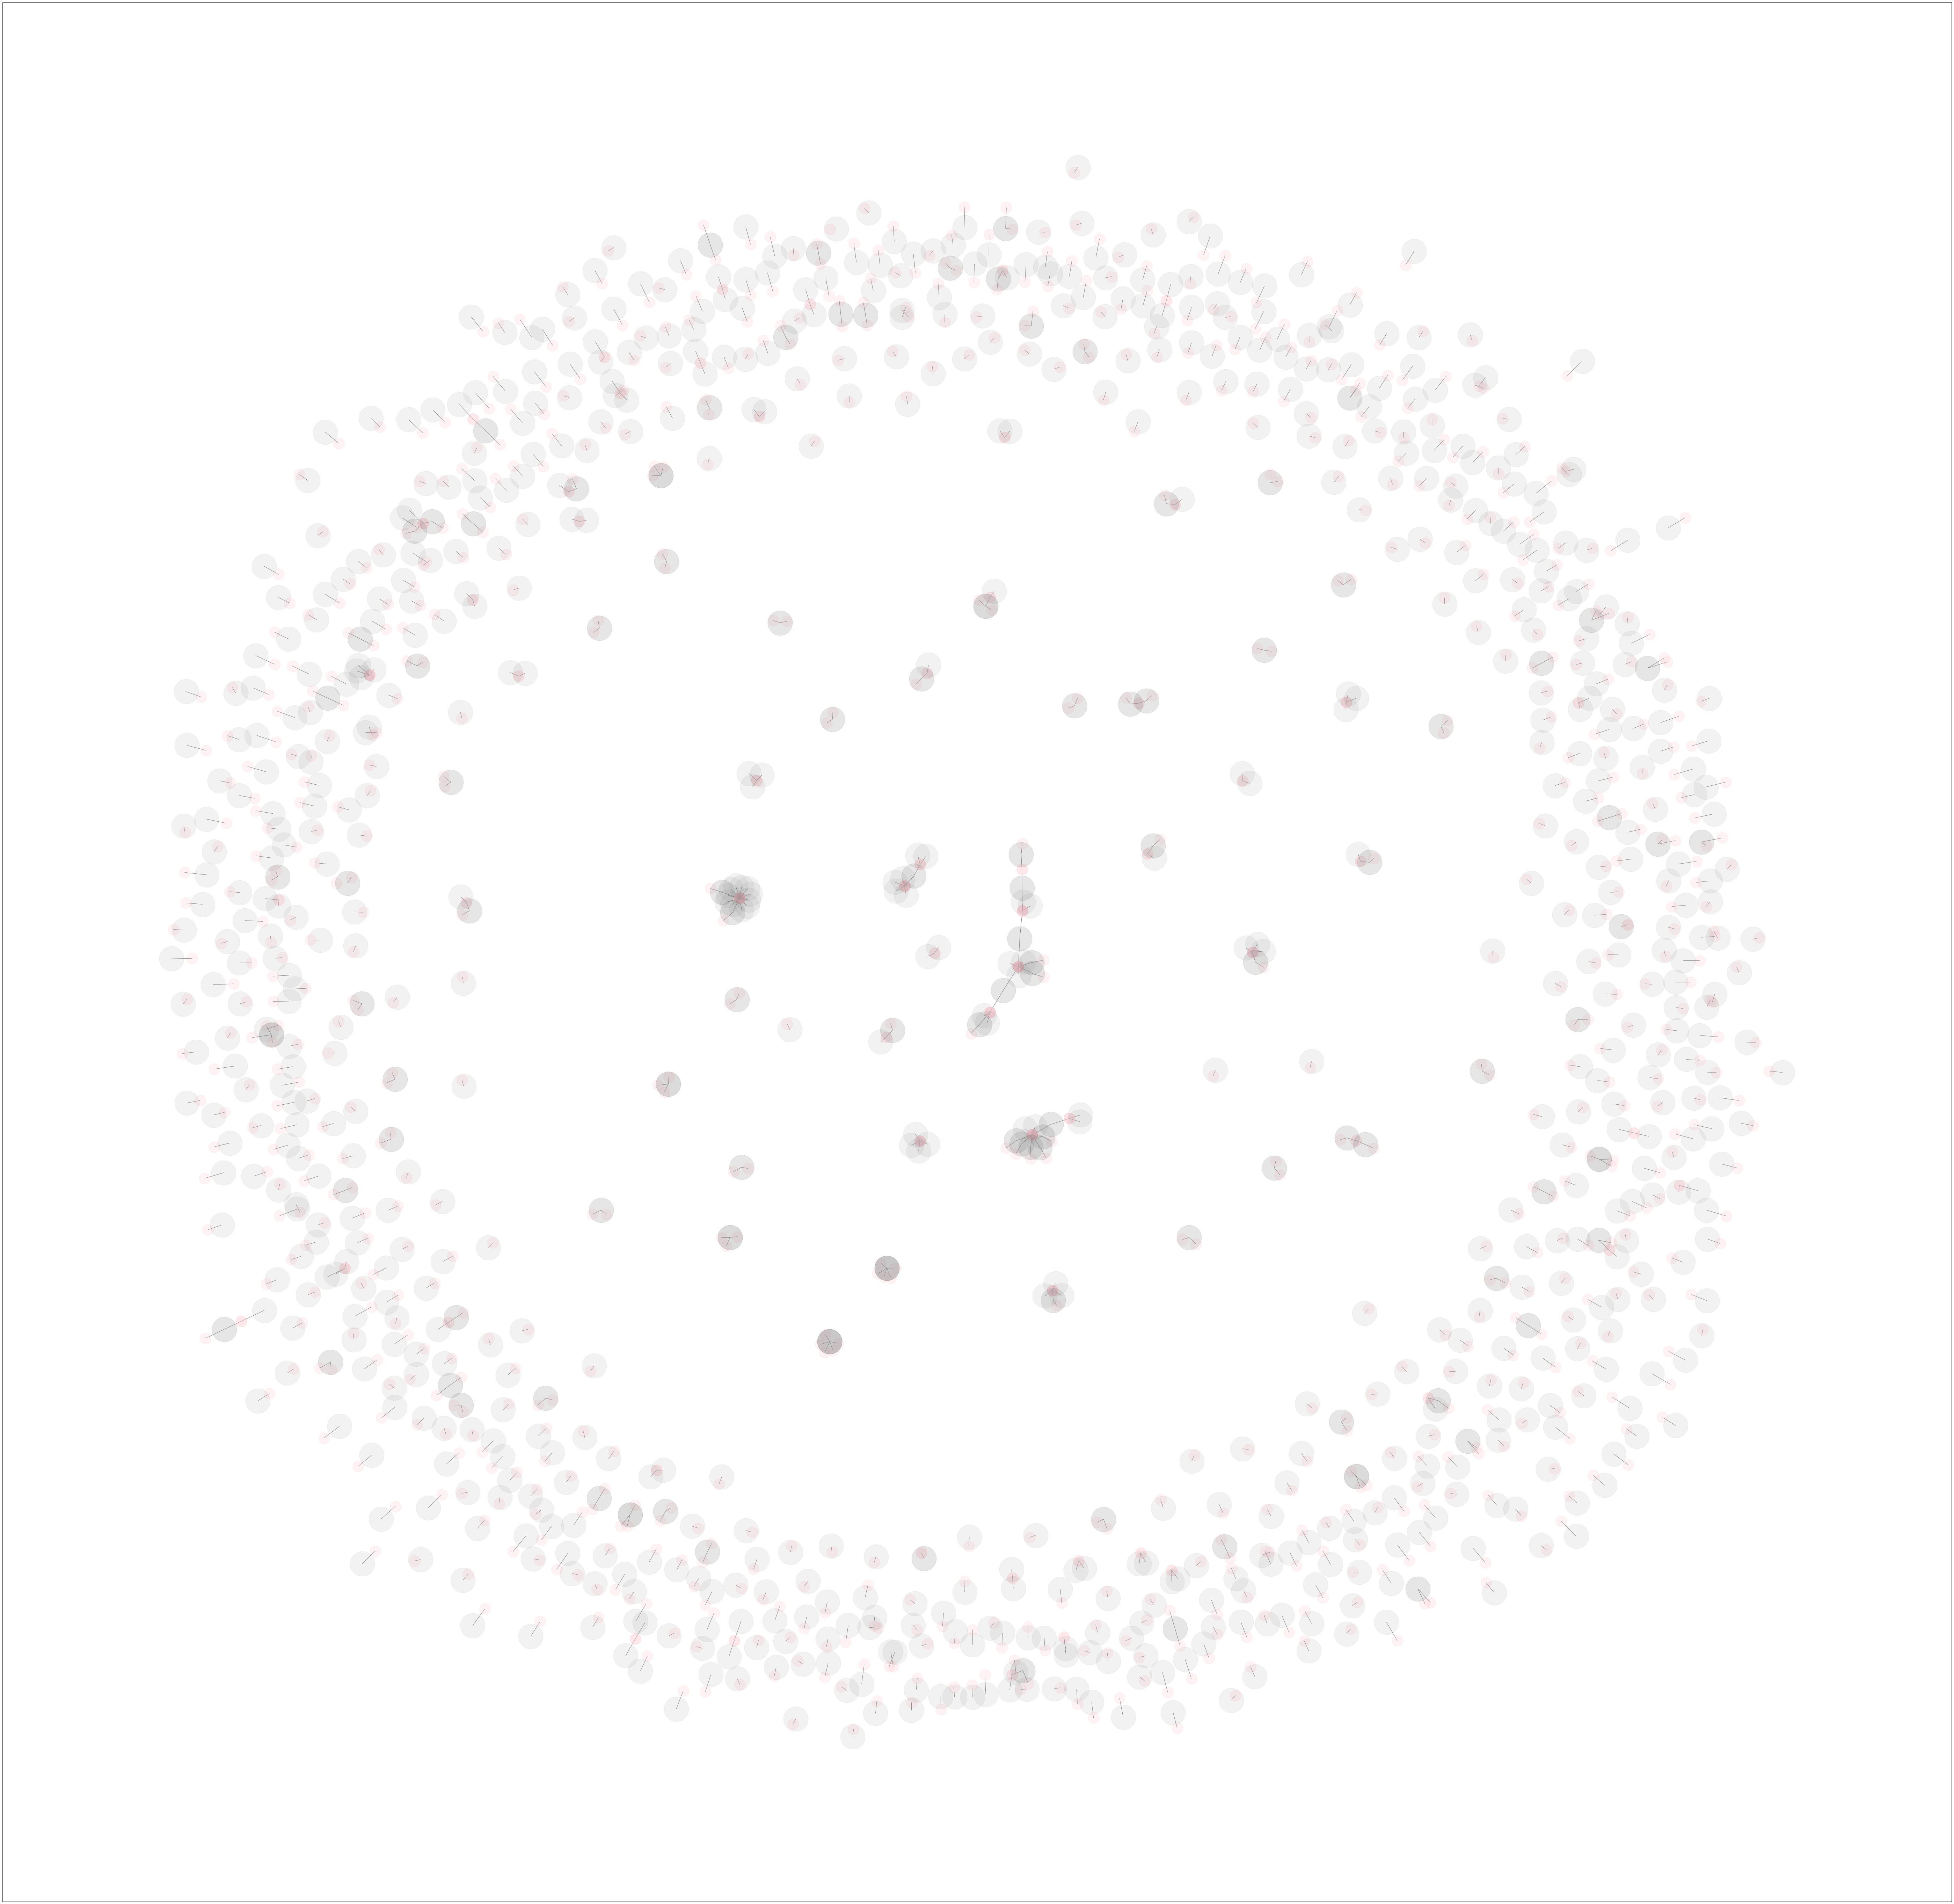

In [173]:
plt.rcParams['figure.figsize'] = (100, 100) 
pos = nx.spring_layout(G)
#color_map =['pink' if isinstance(node,int) else 'grey' for node in G ]
#graph = nx.draw_networkx_nodes(G, pos, node_color=color_map)

nx.draw_networkx_nodes(G, pos,
                       nodelist=user,
                       node_color='pink',
                       alpha=0.2,
                       node_size=1000
                       )

nx.draw_networkx_nodes(G, pos,
                       nodelist=item,
                       node_color='grey',
                       alpha=0.1,
                       node_size=5000
                       )


nx.draw_networkx_edges(G, pos=pos, edge_color='grey')


plt.savefig(name+"_graph.png")
plt.show()